In [1]:
%matplotlib inline 
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt

np.random.seed(0)

### Process training and test data

- load data
- split into samples and labels for training and test data

In [2]:
# read data into program

## read larger data
# training_dataset = np.load('train.npy')
# test_dataset = np.load('test.npy')

# read smaller data
training_dataset = np.load('train_small.npz')
test_dataset = np.load('test_small.npz')

In [3]:
# get training data
# X_train = training_dataset[()]['train_x']
# Y_train = training_dataset[()]['train_labels']
X_train = training_dataset['train_x']
Y_train = training_dataset['train_labels']


N,D = X_train.shape

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

X_train shape:  (24000, 2048)
Y_train shape:  (24000,)


In [4]:
# get test data
# X_test = test_dataset[()]['test_x']
# Y_test = test_dataset[()]['test_labels']
X_test = test_dataset['test_x']
Y_test = test_dataset['test_labels']

N_test,D_test = X_test.shape

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_test shape:  (1000, 2048)
Y_test shape:  (1000,)


In [5]:
# sample from training data

# choose how many samples to sample
n_sample_train = 0.5

# get index
idx_train = np.random.choice(N, int(n_sample_train*N), replace=False)

# map index to rows
x_train = X_train[idx_train,:]
y_train = Y_train[idx_train]

# centerize training data
# x_train = x_train - np.mean( x_train, axis=0 )

# deal with labels to -1 and 1
y_train[ y_train <0.5 ] = -1

n,d = x_train.shape

print("choose {} samples from the training set".format(int(n_sample_train*N)))
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print(n,d)

choose 12000 samples from the training set
x_train shape:  (12000, 2048)
y_train shape:  (12000,)
12000 2048


In [6]:
# sample from test data

# choose how many samples to sample
n_sample_test = 1
# get index
idx_test = np.random.choice(N_test, int(n_sample_test*N_test), replace=False)

# map index to rows
x_test = X_test[idx_test,:]
y_test = Y_test[idx_test]

# x_test = x_test - np.mean( x_test, axis=0 )

y_test[ y_test<0.5 ] = -1

n_test, d_test = x_test.shape

print("choose {} samples from the test set".format(int(n_sample_test*N_test)))
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)
print(n_test, d_test)

choose 1000 samples from the test set
x_test:  (1000, 2048)
y_test:  (1000,)
1000 2048


### Feature Selections
- [x] PCA
- [] SVD

In [7]:
# feature selection using PCA

# cov_training = np.cov( x_train )
# eigenValues_training, eigenVectors_training = np.linalg.eig( cov_training )
# print( eigenValues_training.shape )
# print( eigenVectors_training.shape)

# eigen_ind = eigenValues_training.argsort()[::-1]
# eigenValues_training = eigenValues_training[eigen_ind]
# eigenVectors_training = eigenVectors_training[:, eigen_ind]
# print(eigenValues_training)

In [8]:
# # draw eigen values
# plt.plot( eigenValues_training[:200] )
# plt.ylabel( "eigen values" )
# plt.show()

In [9]:
# do feature selection using SVD

U, s, V = np.linalg.svd(x_train, full_matrices=False)
print("U", U.shape)
print("s", s.shape)
print("V", V.shape)

U (12000, 2048)
s (2048,)
V (2048, 2048)


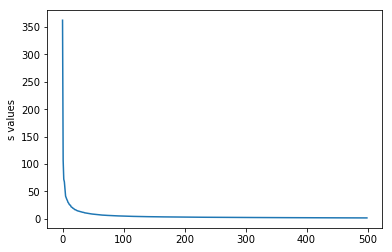

In [10]:
# draw s values
plt.plot( s[:500] )
plt.ylabel( "s values" )
plt.show()

In [11]:
# get new dataset with selected features
n_FS_SVD = 200
s[n_FS_SVD:] = 0
S = np.diag(s)
# x_train = U@S@V
x_train = U[:,:n_FS_SVD]@S[:n_FS_SVD,:n_FS_SVD]@V[:n_FS_SVD,:]
print("x_train shape:", x_train.shape)

x_train shape: (12000, 2048)


In [12]:
# get baseline
positive_rate_test = sum(y_test == 1)/n_test
baseline = positive_rate_test if positive_rate_test >= 0.5 else 1-positive_rate_test
print(baseline)

0.523


### experiment on toy dataset

In [13]:
# # toy training dataset
# dataset = [
#     [1,2,3,4,5],
#     [1,3,4,5,6],
#     [1,3,4,5,3],
#     [1,1,2,3,3],
#     [0,1,5,4,5],
#     [0,3,5,1,3],
#     [0,2,3,5,1]
# ]

# data = np.array(dataset)

In [14]:
# # split toy training data into samples and labels

# x_train = data[:,1:]
# y_train = data[:,0]

# # get the size of the data
# N,D = x_train.shape

# print("Data has {} samples and {} features".format(N, D))
# print("training data size:", x_train.shape)
# print("training label:", y_train.shape)

In [15]:
# # test data
# dataset_test = [
#     [1,4,5,63,5],
#     [1,7,22,1,4],
#     [0,3,4,1,5],
#     [0,66,3,2,1]
# ]

# data_test = np.array(dataset_test)

In [16]:
# # split test data into samples and labels

# x_test = data_test[:,1:]
# y_test = data_test[:,0]

# # get the size of the data
# N_test,D_test = x_test.shape

# print("Data has {} samples and {} features".format(N_test, D_test))
# print("test data size:", x_test.shape)
# print("test label:", y_test.shape)

### Initialize parameters 
- weight
    - mu
    - sigma
- noise

In [ ]:
# Initialize Weight
w_mu = np.zeros(d)
w_sigma = np.eye(d)

#Intialize noise
sigma_square = 0.1**2

print("w_mu size:   ", w_mu.shape)
print("w_sigma size:", w_sigma.shape)

w_mu size:    (2048,)
w_sigma size: (2048, 2048)


### posterior

In [ ]:
# posterior
w_mu_posterior = w_mu + \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @ \
                    (y_train - x_train@w_mu)
w_sigma_posterior = w_sigma - \
                    w_sigma@x_train.T @ \
                    inv(x_train@w_sigma@x_train.T + sigma_square*np.eye(n)) @x_train@w_sigma
    
print("w_mu_posterior: ", w_mu_posterior)
print("w_sigma_posterior: ", w_sigma_posterior)

### predictions

In [ ]:
# prediction
y_star_mu_posterior = x_test@w_mu_posterior
y_star_sigma_posterior = x_test@w_sigma_posterior@x_test.T + \
                            sigma_square*np.eye(n_test)

var = np.sqrt(y_star_sigma_posterior.diagonal())

print("y_star_mu_posterior: ", y_star_mu_posterior)
print("y_star_sigma_posterior: ", y_star_sigma_posterior)
print("var: ", var)

### experiment on prediction result

In [ ]:
# fixed threshold

# get the prediction
threshold = 0

predictions = y_star_mu_posterior.copy()
predictions[ predictions<threshold ] = -1
predictions[ predictions>=threshold ] = 1

# compare predictions to true label
n_correct = sum(predictions == y_test)

print("accuaracy = ", n_correct/n_test)

In [ ]:
# find best threshold
max_correct, best_threshold = 0, 0
record_correct = []
for threshold in np.arange(-2,2,0.1):
    predictions = y_star_mu_posterior.copy()
    predictions[ predictions<threshold ] = -1
    predictions[ predictions>=threshold ] = 1
    n_correct = sum(predictions == y_test)
    record_correct.append( n_correct )
    if n_correct > max_correct:
        max_correct = n_correct
        best_threshold = threshold
    
record_correct = np.array( record_correct )
print( "best accuracy is : ", max_correct/n_test )
print( "best threshold is: ", best_threshold )

In [ ]:
# plot record of correctness w.r.t threshold
print(record_correct)
# print(record_correct)
plt.plot(np.arange(-2,2,0.1), record_correct/n_test)

In [ ]:
# plot
x_index = [i for i in range(n_test)]
plt.scatter(x_index, y_test, c='r', s=50, zorder=10)
plt.plot(x_index, y_star_mu_posterior,'k', lw=3, zorder=9)
plt.fill_between(x_index, y_star_mu_posterior - 2*var, y_star_mu_posterior + 2*var, alpha=0.5, color='k')